In [1]:
# Essential imports and setup for geospatial image classification

# Jupyter magic commands
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# PyTorch
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

# Geospatial libraries
import rasterio
import geopandas as gpd
from rasterio.plot import show
import folium

# Image processing
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Utilities
from tqdm.notebook import tqdm
import os
import json

# Set up device (MPS for Apple Silicon)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Plotting style
plt.style.use('default')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

Using device: mps


In [2]:
import whitebox
import glob

In [3]:
wbt = whitebox.WhiteboxTools()

In [5]:
wbt.set_working_dir("/Users/Anthony/Data and Analysis Local/NYS_Testing/Rasters/")

# Get all .tif files and create semicolon-separated list
tif_files = glob.glob("18*.tif")
input_string = ";".join(tif_files)

# Mosaic
wbt.mosaic(
    inputs=input_string,
    output="NYS_combined_dem.tif"
)

./whitebox_tools --run="Mosaic" --wd="/Users/Anthony/Data and Analysis Local/NYS_Testing/Rasters" --inputs='' --output='NYS_combined_dem.tif' --method=nn -v --compress_rasters=False

****************************
* Welcome to Mosaic        *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Number of tiles: 31
Reading data...
Progress: 0%
Progress: 3%
Progress: 6%
Progress: 10%
Progress: 13%
Progress: 16%
Progress: 20%
Progress: 23%
Progress: 26%
Progress: 30%
Progress: 33%
Progress: 36%
Progress: 40%
Progress: 43%
Progress: 46%
Progress: 50%
Progress: 53%
Progress: 56%
Progress: 60%
Progress: 63%
Progress: 66%
Progress: 70%
Progress: 73%
Progress: 76%
Progress: 80%
Progress: 83%
Progress: 86%
Progress: 90%
Progress: 93%
Progress: 96%
Progress: 100%
Output image size: (8999 x 7499)
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%

0

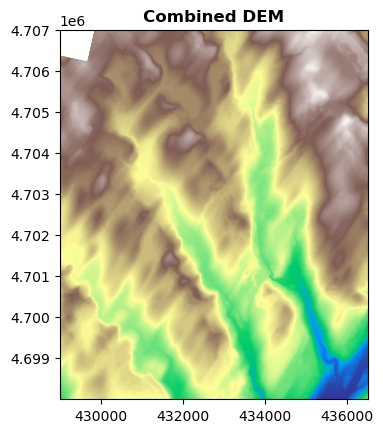

Shape: (8999, 7499)
CRS: LOCAL_CS["unnamed",UNIT["unknown",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Bounds: BoundingBox(left=429000.0, bottom=4698001.0, right=436499.0, top=4707000.0)


In [6]:
with rasterio.open("NYS_Testing/Rasters/NYS_combined_dem.tif") as src:
    show(src, cmap='terrain', title='Combined DEM')
    plt.show()
    
    # Print basic info
    print(f"Shape: {src.shape}")
    print(f"CRS: {src.crs}")
    print(f"Bounds: {src.bounds}")